Использую метод Монте-Карло, чтобы оценить результат своего портфеля на дистанции 3 лет.
То, как работает функция data_for_compare, мне не очень нравится. Буду ее переписывать.

In [58]:
from pandas_datareader import data as wb

In [59]:
from tqdm import tqdm
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
from ipynb.fs.defs.portfolio_analysis import api_connect, get_portfolio, get_id, usd_cur, data_for_compare

In [66]:
def monte_carlo(data):
    
    log_returns = np.log(1 + data.pct_change())
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5 * var)
    stdev = log_returns.std()
    t_intervals = 3*365
    iterations = 1000
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals,iterations)))
    S0 = data.iloc[-1]
    
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    
    for t in range(1, t_intervals):
        price_list[t] = price_list[t-1]*daily_returns[t]
        
    return np.median(price_list)

In [2]:
f = open('../tokens.txt')
token = f.read()

In [ ]:
client = api_connect(token)

In [68]:
broker, iis = get_id(client)

In [69]:
usd = usd_cur(client)

In [70]:
df = get_portfolio(client,iis, usd)

In [71]:
df = df[((df['ticker'] != 'USD000UTSTOM') & (df['ticker'] != 'EUR_RUB__TOM'))]

In [72]:
ticks = df[['ticker', 'n_shares']]
ticks = ticks.set_index('ticker')

In [75]:
data = data_for_compare(ticks)

In [76]:
meds = list()
for _ in tqdm(range(1000)):
    meds.append(monte_carlo(data))

100%|██████████| 1000/1000 [01:19<00:00, 12.55it/s]


In [77]:
print(np.min(meds), np.max(meds), np.median(meds))

6698.841520138848 6950.1147783637425 6827.636832387037


<AxesSubplot:xlabel='Date'>

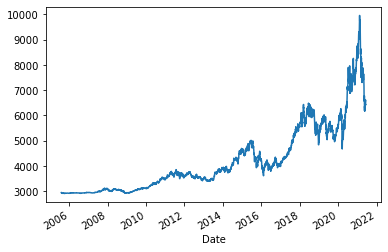

In [78]:
data.plot()